In [172]:
#Import relevant libraries

In [173]:
from sklearn.model_selection import train_test_split 

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
from sklearn import metrics
import pandas as pd

In [176]:
#featers Extraction

In [177]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
x=data['PassengerId']

In [179]:
y = data['Survived']

In [180]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [181]:
data.groupby(["Survived"])[["Pclass", "Survived"]].mean()

,Pclass,Survived
Survived,,
0,2.531876,0.0
1,1.950292,1.0


In [182]:
data.drop(columns=['Name'], axis=1,inplace=False)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [183]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [184]:
#splitting data with test size of 25%
import numpy as np

In [185]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
x_train_resahpe=np.reshape(np.array(x_train),(-1,1))
y_train_resahpe=np.reshape(np.array(y_train),(-1,1))
x_test_resahpe=np.reshape(np.array(x_test),(-1,1))
y_test_resahpe=np.reshape(np.array(y_test),(-1,1))


In [186]:
print(x_train_resahpe.shape)
print(y_train.shape)
print(x_test_resahpe.shape)


(668, 1)
(668,)
(223, 1)


In [187]:
#build our logistic model

In [188]:
logreg = LogisticRegression()

In [189]:
#fitting training data

In [190]:
model1=logreg.fit(x_train_resahpe, y_train)

In [191]:
 #testing model’s performance

In [192]:
y_pred=logreg.predict(x_test_resahpe)    

In [193]:
#performance

In [194]:
print("probability of surviving={:.2f}".format(logreg.score(x_test_resahpe, y_test)))

probability of surviving=0.62


In [195]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report#Evaluation de performance de ML

<AxesSubplot:xlabel='PassengerId', ylabel='Survived'>

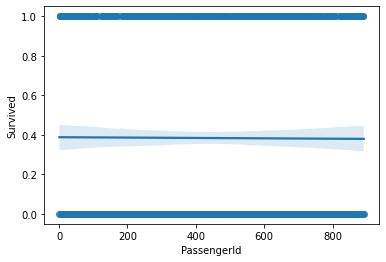

In [196]:
sns.regplot(x='PassengerId',y='Survived',data=data)

In [203]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       139
           1       1.00      0.00      0.00        84

    accuracy                           0.62       223
   macro avg       0.81      0.50      0.38       223
weighted avg       0.77      0.62      0.48       223

